In [10]:
import warnings
warnings.filterwarnings('ignore')

path = "../../kaggle/data/"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Pour afficher des caréctéritiques des datasets
def inspect_columns(df):    
    total_rows = len(df)
    result = pd.DataFrame({
        'total_rows': [total_rows] * df.shape[1],
        'missing_values': df.isnull().sum(),
        'unique': df.nunique() == total_rows,
        'cardinality': df.nunique(),
        'with_null': df.isna().any(),
        'null_pct': round((df.isnull().sum() / total_rows) * 100, 2),
        '1st_row': df.iloc[0],
        'random_row': df.iloc[np.random.randint(low=0, high=total_rows)],
        'last_row': df.iloc[-1],
        'dtype': df.dtypes,

    })
    
    return result

### I. Chargement des Datasets

#### **1.  Train.csv & Test.csv**

In [21]:
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")

train["date"] = pd.to_datetime(train.date)
test["date"] = pd.to_datetime(test.date)

##### **1.1.  Descriptions des variables de train & test Datasets:**

- **date** : The date when the data was recorded.
- **store_nbr** : Identifies the store at which the products are sold.
- **family** : Identifies the type of product sold.
- **onpromotion** : Gives the total number of items in a product family that were being promoted at a store at a given date.

 The <ins>**Target variable**</ins>
- **sales** : Gives the total sales for a product family at a particular store at a given date. Fractional values are possible.

##### **1.2.  Caractéristiques des variables de train & test Datasets:**

In [22]:
inspect_columns(train)

,total_rows,missing_values,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
id,3000888,0,True,3000888,False,0.0,0,1408615,3000887,int64
date,3000888,0,False,1684,False,0.0,2013-01-01 00:00:00,2015-03-04 00:00:00,2017-08-15 00:00:00,datetime64[ns]
store_nbr,3000888,0,False,54,False,0.0,1,32,9,int64
family,3000888,0,False,33,False,0.0,AUTOMOTIVE,EGGS,SEAFOOD,object
sales,3000888,0,False,379610,False,0.0,0.0,177.0,16.0,float64
onpromotion,3000888,0,False,362,False,0.0,0,0,0,int64


In [23]:
inspect_columns(test)

,total_rows,missing_values,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
id,28512,0,True,28512,False,0.0,3000888,3028244,3029399,int64
date,28512,0,False,16,False,0.0,2017-08-16 00:00:00,2017-08-31 00:00:00,2017-08-31 00:00:00,datetime64[ns]
store_nbr,28512,0,False,54,False,0.0,1,26,9,int64
family,28512,0,False,33,False,0.0,AUTOMOTIVE,SEAFOOD,SEAFOOD,object
onpromotion,28512,0,False,212,False,0.0,0,0,0,int64


In [3]:
print('-' * 50)
display('*** Train ***')
print()
display(train.head(2))
display(train.tail(2))
print()
print('-' * 50)
print()
display('***Test***')
print()
display(test.head(2))
display(test.tail(2))
print('-' * 50)

--------------------------------------------------


'*** Train ***'

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0


,id,date,store_nbr,family,sales,onpromotion
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.0,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.0,0



--------------------------------------------------



'***Test***'

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0


,id,date,store_nbr,family,onpromotion
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9
28511,3029399,2017-08-31,9,SEAFOOD,0


--------------------------------------------------


In [41]:
# liste de famille des produits vendus par chque magasin
train.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [35]:
# Liste des stores
np.array(sorted(train.store_nbr.unique()))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54])

#### **2.  Chargement de stores.csv**

In [36]:
stores = pd.read_csv(path + "stores.csv")

##### **2.1.  Description des variables de stores Dataset**

- **store_nbr** : The store number, a unique identifier for each store.
- **city** : The city where the store is located.
- **state** : The state where the store is located.
- **type** : The type of store.
- **cluster** : A grouping of similar stores.

##### **2.2.  Caractéristiques des variables de stores Dataset**

In [37]:
inspect_columns(stores)

,total_rows,missing_values,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
store_nbr,54,0,True,54,False,0.0,1,13,54,int64
city,54,0,False,22,False,0.0,Quito,Latacunga,El Carmen,object
state,54,0,False,16,False,0.0,Pichincha,Cotopaxi,Manabi,object
type,54,0,False,5,False,0.0,D,C,C,object
cluster,54,0,False,17,False,0.0,13,15,3,int64


In [40]:
stores.sample(5)

,store_nbr,city,state,type,cluster
33,34,Guayaquil,Guayas,B,6
11,12,Latacunga,Cotopaxi,C,15
17,18,Quito,Pichincha,B,16
49,50,Ambato,Tungurahua,A,14
14,15,Ibarra,Imbabura,C,15


#### **3.  Analyse de : Trend Seasonality & Residuals**

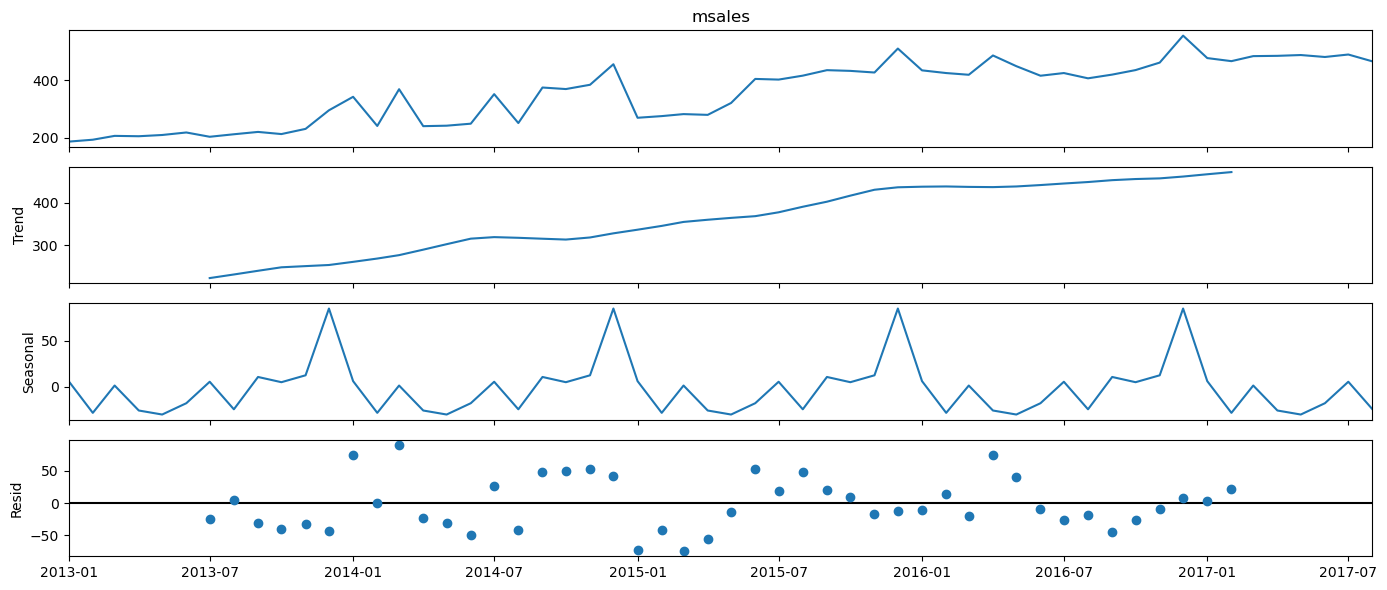

In [24]:
t_series = train.groupby(['date'])['sales'].agg(['mean']).reset_index().rename(columns={'mean': 'msales'})
t_series = t_series.set_index('date')
sample = t_series['msales'].resample('MS').mean()
decomposition = sm.tsa.seasonal_decompose(sample, model='additive')
fig = decomposition.plot()
fig.set_size_inches((14, 6))
fig.tight_layout()
plt.show()
plt.close()

#### **4.  Chargement de Transactions.csv**

In [32]:
transactions = pd.read_csv(path + "transactions.csv")
transactions["date"] = pd.to_datetime(transactions.date)

##### **4.1.  Descriptions des variables de transactions Dataset:**
- **date** : The date when the data was recorded.
- **store_nbr** : The store number, a unique identifier for each store.
- **transactions** : The total number of transactions that occurred in a store on a given date.

In [ ]:
##### **4.1.  Descriptions des variables de transactions Dataset:**

In [42]:
inspect_columns(transactions)

,total_rows,missing_values,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
date,83488,0,False,1682,False,0.0,2013-01-01 00:00:00,2016-02-14 00:00:00,2017-08-15 00:00:00,datetime64[ns]
store_nbr,83488,0,False,54,False,0.0,25,42,54,int64
transactions,83488,0,False,4993,False,0.0,770,1263,802,int64


In [44]:
transactions.sample(5)

,date,store_nbr,transactions
27666,2014-08-19,35,697
40703,2015-05-18,28,1116
40136,2015-05-06,50,2484
71727,2017-01-08,18,1341
6844,2013-05-30,15,1390


In [30]:
# Merging the train and transactions datasets on 'date' and 'store_nbr' 
train_merged = pd.merge(train, transactions, on=['date', 'store_nbr'], how='left')

# Merging the train_merged and Oil datasets on 'date' (Remember to take average of oil price during analysis)
train_merged = pd.merge(train_merged, oil, on=['date'], how='left')
# Merging the train_merged and Holiday Event datasets on 'date' (Take Note the date in Holiday is not unique)\
holidays_events_unique = holidays_events.groupby(by='date').agg({'transferred':'max'})
train_merged = pd.merge(train_merged, holidays_events_unique, on=['date'], how='left')
# Merging the train_merged and stores datasets on 'store_nbr' 
train_merged = pd.merge(train_merged, stores, on=['store_nbr'], how='left')

# Check the intergity of the train data set

if len(train) == len(train_merged):
    print('\033[92m ✅ Integrity Check Passed: The length of the original and merged datasets are equal.\033[0m')
else:
    print('\033[91m ❌ Integrity Check Failed: The length of the original and merged datasets differ.\033[0m')

NameError: name 'transactions' is not defined

In [29]:
train_merged['date'] = pd.to_datetime(train_merged['date'])

# Aggregate daily sales
daily_sales = train_merged.groupby('date')['sales'].sum().reset_index()

# Calculate the 30-day moving average of daily sales
daily_sales['30_day_ma'] = daily_sales['sales'].rolling(window=30).mean()

# Plotting
plt.figure(figsize=(14, 7))

# Original daily sales with transparency
plt.plot(daily_sales['date'], daily_sales['sales'], label='Daily Sales', color='skyblue', alpha=0.5)

# 30-day moving average of sales
plt.plot(daily_sales['date'], daily_sales['30_day_ma'], label='30-Day Moving Average', color='darkblue', linewidth=2)

# Enhancing the plot
plt.title('Daily Sales and 30-Day Moving Average Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend()

plt.show()

NameError: name 'train_merged' is not defined

In [ ]:
holiday_events = pd.read_csv(path + "holidays_events.csv")
oil = pd.read_csv(path + "oil.csv")


holiday_events["date"] = pd.to_datetime(holiday_events.date)
oil["date"] = pd.to_datetime(oil.date)


In [ ]:
From oil.csv:
date - The date when the oil price was recorded.
dcoilwtico - The daily oil price; "WTI" refers to West Texas Intermediate, a grade of crude oil used as a benchmark in oil pricing.

From holidays_events.csv:
date - The date of the holiday or event.
type - The type of holiday or event (e.g., Holiday, Event, Bridge, Work Day, Transfer).
locale - The locale where the holiday is observed (e.g., National, Regional, Local).
locale_name - The name of the locale where the holiday is observed.
description - A brief description of the holiday or event.
transferred - Indicates whether the holiday was transferred to another date (True or False).

